# Assignment 4

This assignment uses opsd_germany_daily.csv which contains data on the following: German electricity consumption, wind power generation and solar power generation. We will also use another file GermanWeather1.csv which contains German weather data on an hourly basis.

Q1

Import the standard libraries and read in the dataset:

In [1]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn; seaborn.set()
    

df = pd.read_csv('opsd_germany_daily.csv', parse_dates=['Date'],index_col = 'Date', dayfirst = True) 
df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


Q2 

Read in the weather dataset

In [2]:
df_w = pd.read_csv('GermanWeather1.csv')
df_w = df_w.rename(columns={'GR_temperature':'GR_temp'}) 
df_w.head()

,year,month,day,hour,GR_temp,GR_radiation_direct_horizontal,GR_radiation_diffuse_horizontal
0,1980,1,1,0,9.912,0.0,0.0
1,1980,1,1,1,9.369,0.0,0.0
2,1980,1,1,2,9.056,0.0,0.0
3,1980,1,1,3,8.658,0.0,0.0
4,1980,1,1,4,8.335,0.0,0.0


Q3 

The weather dataset has year, month, day, and hour in separate columns. 

Define the date- time index in pandas as follows:

df_w.index = pd.to_datetime(df_w[['year', 'month', 'day','hour']]) 

df_w.head()

In [3]:
df_w.index = pd.to_datetime(df_w[['year', 'month', 'day','hour']]) 
df_w.head()

,year,month,day,hour,GR_temp,GR_radiation_direct_horizontal,GR_radiation_diffuse_horizontal
1980-01-01 00:00:00,1980,1,1,0,9.912,0.0,0.0
1980-01-01 01:00:00,1980,1,1,1,9.369,0.0,0.0
1980-01-01 02:00:00,1980,1,1,2,9.056,0.0,0.0
1980-01-01 03:00:00,1980,1,1,3,8.658,0.0,0.0
1980-01-01 04:00:00,1980,1,1,4,8.335,0.0,0.0


Q4

Resample the hourly weather data to a monthly frequency using the mean of the values in the month as opposed to the sum of the values in the day. 

Plot a figure of the mean monthly temperature in Germany for all the months in the sample.

In [4]:
monthly = df_w.resample('M').mean()

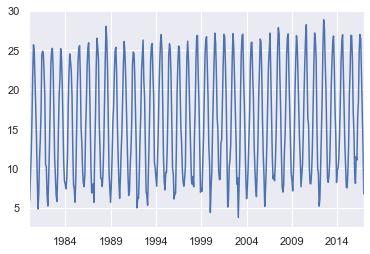

In [5]:
monthly['GR_temp'].plot();

Q5

Resample the hourly weather data to a daily frequency using the mean of the values in the day as opposed to the sum of the values in the day. 

Denote this resampled daily dataframe as daily.


In [6]:
daily = df_w.resample('D').mean()
daily

,year,month,day,hour,GR_temp,GR_radiation_direct_horizontal,GR_radiation_diffuse_horizontal
1980-01-01,1980.0,1.0,1.0,11.5,7.529083,18.433225,54.012225
1980-01-02,1980.0,1.0,2.0,11.5,8.019667,4.473696,46.944163
1980-01-03,1980.0,1.0,3.0,11.5,7.627208,22.868400,53.706346
1980-01-04,1980.0,1.0,4.0,11.5,2.080625,29.615550,53.069429
1980-01-05,1980.0,1.0,5.0,11.5,1.823250,97.373750,22.397550
...,...,...,...,...,...,...,...
2016-12-27,2016.0,12.0,27.0,11.5,8.550875,59.000829,38.708600
2016-12-28,2016.0,12.0,28.0,11.5,5.158000,36.101225,48.822625
2016-12-29,2016.0,12.0,29.0,11.5,3.316542,9.192654,51.614954
2016-12-30,2016.0,12.0,30.0,11.5,2.327250,36.422850,49.061267


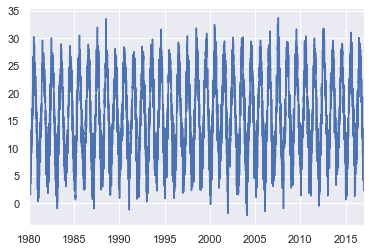

In [7]:
daily['GR_temp'].plot();

Q6

Join the daily electricity dataframe (df) and the daily weather dataframe (daily) together by the date index

In [8]:
df = df.join(daily['GR_temp'])
df

,Consumption,Wind,Solar,Wind+Solar,GR_temp
Date,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,9.306750
2006-01-02,1380.52100,NaN,NaN,NaN,10.368750
2006-01-03,1442.53300,NaN,NaN,NaN,10.668083
2006-01-04,1457.21700,NaN,NaN,NaN,10.836458
2006-01-05,1477.13100,NaN,NaN,NaN,9.309042
...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,NaN
2017-12-28,1299.86398,506.424,14.162,520.586,NaN
2017-12-29,1295.08753,584.277,29.854,614.131,NaN


Q7

Add days of the week columns to the dataframe

In [9]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)
daily

,year,month,day,hour,GR_temp,GR_radiation_direct_horizontal,GR_radiation_diffuse_horizontal,Mon,Tue,Wed,Thu,Fri,Sat,Sun
1980-01-01,1980.0,1.0,1.0,11.5,7.529083,18.433225,54.012225,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1980-01-02,1980.0,1.0,2.0,11.5,8.019667,4.473696,46.944163,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1980-01-03,1980.0,1.0,3.0,11.5,7.627208,22.868400,53.706346,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1980-01-04,1980.0,1.0,4.0,11.5,2.080625,29.615550,53.069429,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1980-01-05,1980.0,1.0,5.0,11.5,1.823250,97.373750,22.397550,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,2016.0,12.0,27.0,11.5,8.550875,59.000829,38.708600,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2016-12-28,2016.0,12.0,28.0,11.5,5.158000,36.101225,48.822625,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2016-12-29,2016.0,12.0,29.0,11.5,3.316542,9.192654,51.614954,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2016-12-30,2016.0,12.0,30.0,11.5,2.327250,36.422850,49.061267,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Q8

Add an hours of daylight column to the dataframe. 

Use axis=13.4, latitude=52.52 for German daylight hours.

(8.0, 17.0)

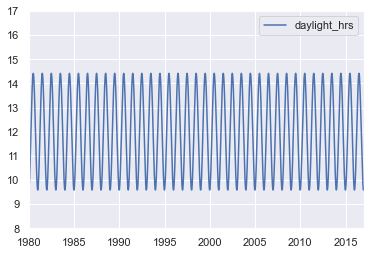

In [10]:
from datetime import datetime
def hours_of_daylight(date, axis=13.4, latitude=52.52):
    """Compute the hours of daylight for the given date"""
    days = (date - datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))* np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.
   
daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)

In [11]:
daily

,year,month,day,hour,GR_temp,GR_radiation_direct_horizontal,GR_radiation_diffuse_horizontal,Mon,Tue,Wed,Thu,Fri,Sat,Sun,daylight_hrs
1980-01-01,1980.0,1.0,1.0,11.5,7.529083,18.433225,54.012225,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.626603
1980-01-02,1980.0,1.0,2.0,11.5,8.019667,4.473696,46.944163,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.634766
1980-01-03,1980.0,1.0,3.0,11.5,7.627208,22.868400,53.706346,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.643672
1980-01-04,1980.0,1.0,4.0,11.5,2.080625,29.615550,53.069429,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.653318
1980-01-05,1980.0,1.0,5.0,11.5,1.823250,97.373750,22.397550,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.663697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,2016.0,12.0,27.0,11.5,8.550875,59.000829,38.708600,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.600283
2016-12-28,2016.0,12.0,28.0,11.5,5.158000,36.101225,48.822625,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.605249
2016-12-29,2016.0,12.0,29.0,11.5,3.316542,9.192654,51.614954,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.610972
2016-12-30,2016.0,12.0,30.0,11.5,2.327250,36.422850,49.061267,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.617450


Q9 

Drop any rows with null values.

In [12]:
df.dropna(axis=0, how='any', inplace=True) 
df.head()

,Consumption,Wind,Solar,Wind+Solar,GR_temp
Date,,,,,
2012-01-01,948.128,227.465,6.587,234.052,5.239625
2012-01-02,1269.581,207.327,6.574,213.901,6.152125
2012-01-03,1334.745,473.468,24.679,498.147,7.838125
2012-01-04,1347.136,499.804,14.681,514.485,8.106458
2012-01-05,1376.658,523.851,5.071,528.922,8.559083


Q10

Plot each of the following as a function of the day of the week: (i) electricity consumption, (ii) wind power generation and (iii) solar power generation. 

Provide a one-line comment for each plot.

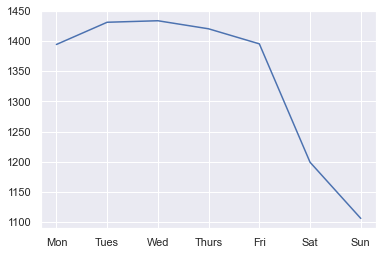

In [13]:
by_weekday = df.groupby(df.index.dayofweek).mean() 
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs','Fri', 'Sat', 'Sun']
by_weekday['Consumption'].plot();

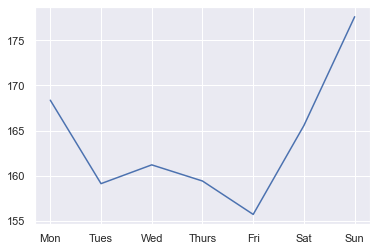

In [14]:
by_weekday['Wind'].plot();

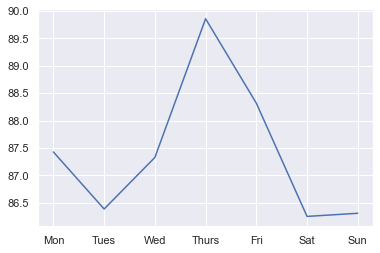

In [15]:
by_weekday['Solar'].plot();

comment: energy consumption is larger on weekdays, the fact that makes sense since companies consume much energy when operating. On the other hand, wind and solar power generations should be independent whether the day is weekdays or not; the tendency in the data might have caused by pure randomness.

Q11

Use Scikit Learn to run three separate regressions where the response variable y is set equal to (i) electricity consumption, (ii) wind power generation and (iii) solar power generation. 

For each regression model, set the explanatory variables to be the days of the week, day- light hours and mean daily temperature.

In [16]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df = df.join(daily[days])
df = df.join(daily[['daylight_hrs']])
df

,Consumption,Wind,Solar,Wind+Solar,GR_temp,Mon,Tue,Wed,Thu,Fri,Sat,Sun,daylight_hrs
Date,,,,,,,,,,,,,
2012-01-01,948.128,227.465,6.587,234.052,5.239625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.626603
2012-01-02,1269.581,207.327,6.574,213.901,6.152125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.634766
2012-01-03,1334.745,473.468,24.679,498.147,7.838125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.643672
2012-01-04,1347.136,499.804,14.681,514.485,8.106458,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.653318
2012-01-05,1376.658,523.851,5.071,528.922,8.559083,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.663697
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,1289.324,640.895,23.448,664.343,8.550875,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.600283
2016-12-28,1294.881,214.990,19.450,234.440,5.158000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.605249
2016-12-29,1295.897,167.698,42.910,210.608,3.316542,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.610972


In [17]:
from sklearn.linear_model import LinearRegression # Drop any rows with null values
column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun','daylight_hrs','GR_temp']
X = df[column_names]
y = df['Consumption']
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
df['predicted_con'] = model.predict(X)

y = df['Wind']
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
df['predicted_wind'] = model.predict(X)

y = df['Solar']
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
df['predicted_solar'] = model.predict(X)

df

,Consumption,Wind,Solar,Wind+Solar,GR_temp,Mon,Tue,Wed,Thu,Fri,Sat,Sun,daylight_hrs,predicted_con,predicted_wind,predicted_solar
Date,,,,,,,,,,,,,,,,
2012-01-01,948.128,227.465,6.587,234.052,5.239625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.626603,1193.643218,252.810579,17.791675
2012-01-02,1269.581,207.327,6.574,213.901,6.152125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.634766,1479.361015,241.219255,19.151896
2012-01-03,1334.745,473.468,24.679,498.147,7.838125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.643672,1510.887522,227.940078,18.504400
2012-01-04,1347.136,499.804,14.681,514.485,8.106458,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.653318,1512.326612,229.196305,19.698282
2012-01-05,1376.658,523.851,5.071,528.922,8.559083,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.663697,1497.217409,226.078382,22.611134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,1289.324,640.895,23.448,664.343,8.550875,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.600283,1509.758937,227.287993,17.323799
2016-12-28,1294.881,214.990,19.450,234.440,5.158000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.605249,1522.095184,236.634835,18.093358
2016-12-29,1295.897,167.698,42.910,210.608,3.316542,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.610972,1513.852691,238.622347,20.691168


Q12

Plot the predicted response and the actual response for each of the three regressions.

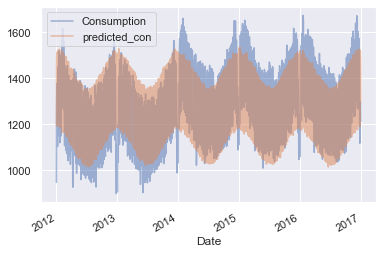

In [18]:
df[['Consumption', 'predicted_con']].plot(alpha=0.5);

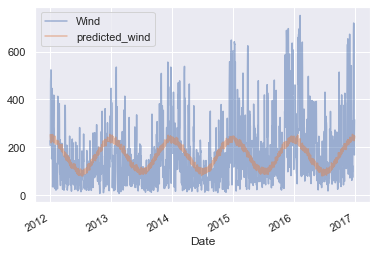

In [19]:
df[['Wind', 'predicted_wind']].plot(alpha=0.5);

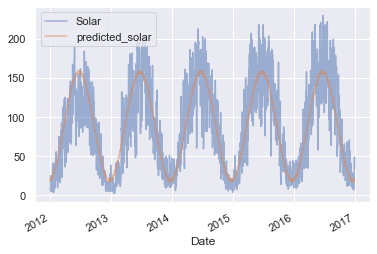

In [20]:
df[['Solar', 'predicted_solar']].plot(alpha=0.5);

Q13

Use statsmodels to run the same regressions. 

For each of the three regressions include a one line comment on the R2 value, the daylight hours coefficient and the temperature coefficient. 

That is, include a comment as to whether or not the signs on these coefficients make sense.


In [21]:
df

,Consumption,Wind,Solar,Wind+Solar,GR_temp,Mon,Tue,Wed,Thu,Fri,Sat,Sun,daylight_hrs,predicted_con,predicted_wind,predicted_solar
Date,,,,,,,,,,,,,,,,
2012-01-01,948.128,227.465,6.587,234.052,5.239625,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.626603,1193.643218,252.810579,17.791675
2012-01-02,1269.581,207.327,6.574,213.901,6.152125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.634766,1479.361015,241.219255,19.151896
2012-01-03,1334.745,473.468,24.679,498.147,7.838125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.643672,1510.887522,227.940078,18.504400
2012-01-04,1347.136,499.804,14.681,514.485,8.106458,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.653318,1512.326612,229.196305,19.698282
2012-01-05,1376.658,523.851,5.071,528.922,8.559083,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.663697,1497.217409,226.078382,22.611134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-27,1289.324,640.895,23.448,664.343,8.550875,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.600283,1509.758937,227.287993,17.323799
2016-12-28,1294.881,214.990,19.450,234.440,5.158000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.605249,1522.095184,236.634835,18.093358
2016-12-29,1295.897,167.698,42.910,210.608,3.316542,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9.610972,1513.852691,238.622347,20.691168


In [22]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols("Consumption ~ Mon+Tue+Wed+Thu+Fri+Sat+Sun+daylight_hrs+GR_temp-1", data = df).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:            Consumption   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     431.0
Date:                Tue, 07 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:49:15   Log-Likelihood:                -10929.
No. Observations:                1822   AIC:                         2.188e+04
Df Residuals:                    1813   BIC:                         2.193e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Mon           1713.4254     20.824     82.283   

comment:

The R^2 of the model is more than 0.6, indicating that the model fit well.

The daylight hours coefficient is -22 and the temperature coefficient is -2.95. Theses signs make sense because people consume much energy to keep warm in Germany. To put it differently, people there consume less energy when the temperature is high or the daylight time is long.

In [23]:
mod = ols("Wind ~ Mon+Tue+Wed+Thu+Fri+Sat+Sun+daylight_hrs+GR_temp-1", data = df).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                   Wind   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     34.66
Date:                Tue, 07 Sep 2021   Prob (F-statistic):           2.77e-51
Time:                        18:49:15   Log-Likelihood:                -11395.
No. Observations:                1822   AIC:                         2.281e+04
Df Residuals:                    1813   BIC:                         2.286e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Mon            455.3848     26.892     16.934   

comment:

The R^2 of the model is about 0.13, indicating that the model specification might be insufficient or wrong.

The daylight hours coefficient is -20.83 and the temperature coefficient is -2.18. Both might suggest that in the winter, the wind condition are less suitable for wind generation.

In [24]:
mod = ols("Solar ~ Mon+Tue+Wed+Thu+Fri+Sat+Sun+daylight_hrs+GR_temp-1", data = df).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  Solar   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     615.0
Date:                Tue, 07 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:49:15   Log-Likelihood:                -8758.3
No. Observations:                1822   AIC:                         1.753e+04
Df Residuals:                    1813   BIC:                         1.758e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Mon           -256.0698      6.327    -40.473   

comment:

The R^2 of the model is about 0.73, indicating that the model fit the data well.

The daylight hours coefficient is 28.51 and the temperature coefficient is 0.0795. It is not suprising that the day light hour has strong positive marginal effect on solar generation. It is also expected that the temperature codefficent is positive since higher the temperture is, more the daylight hours.